# Systematic impacts of word onsets on word concreteness

Do the sounds in a word impact its meaning? 

In [another notebook](http://localhost:8888/notebooks/concreteness_impacts.ipynb), I showed that the first character of a word *can* have predictable effects on its concreteness. Here, I repeat this analysis, but with phonetic representations of words (using [PhonDISC](http://groups.linguistics.northwestern.edu/speech_comm_group/documents/CELEX/Phonetic%20codes%20for%20CELEX.pdf)). 

In [2]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sn

# Operations
import numpy as np
import pandas as pd 
import statsmodels.formula.api as sm
from tqdm import tqdm

# Custom imports
from nlp_utilities.compling import CorpusUtilities
from src.utils import get_concreteness_for_word




In [3]:
# Set global variables
DATA_PATH = "data/raw/mrc_concreteness.csv"
CHARACTER_INDEX	= 0

# Get data
df = pd.read_csv(DATA_PATH, sep="\t")
df['Word'] = df['Word'].str.lower()

# Rescale concreteness
df['Concreteness'] = df['Concreteness'] / 100

# Drop duplicates
df = df.drop_duplicates(subset="Word")
print("Number of words left in MRC: {num}".format(num=len(df)))

# Merge with celex
df_celex = pd.read_csv("data/raw/celex_all.csv", sep = "\\")
df_celex = df_celex.drop_duplicates(subset='Word')
print("Number of words in CELEX: {num}".format(num=len(df_celex)))

# Merge together to get phonetic representations
df_merged = df_celex.merge(df, on="Word")
print("Number of words in both MRC and CELEX: {num}".format(num=len(df_merged)))

# Drop duplicate phonetic representations (homophones)
df_merged = df_merged.drop_duplicates(subset = 'PhonDISC')
print("Number of words left: {num}".format(num=len(df_merged)))

# Get minimal sets
print("Getting minimal sets...")
minimal_sets = CorpusUtilities.get_minimal_orthographic_sets(df_merged['PhonDISC'], index=CHARACTER_INDEX)
print("Number of minimal sets: {num}".format(num=len(minimal_sets)))

  0%|          | 0/3947 [00:00<?, ?it/s]

Number of words left in MRC: 4293
Number of words in CELEX: 46133
Number of words in both MRC and CELEX: 4136
Number of words left: 3947
Getting minimal sets...


100%|██████████| 3947/3947 [01:25<00:00, 45.93it/s] 


In [4]:
# Calculate onset impact
onset_to_impact = []
for set_index, ms in tqdm(list(enumerate(minimal_sets))):
	letters = [w[CHARACTER_INDEX] for w in ms]
	by_word_cnc = get_concreteness_for_word(ms, df_merged, column='PhonDISC')
	mean_cnc = np.mean(by_word_cnc)
	for index, onset in enumerate(letters):
		to_add = [onset, by_word_cnc[index] - mean_cnc, mean_cnc, ms[index], set_index]
		onset_to_impact.append(to_add)

COLUMNS = ['onset', 'concreteness_impact', 'set_mean', 'original_word', 'set_index']
final_df = pd.DataFrame(onset_to_impact, columns=COLUMNS)



100%|██████████| 412/412 [00:01<00:00, 219.61it/s]


## Analysis

Now we look at whether particular onsets have systematic impacts on the concreteness of the words in which they appear.

In [35]:
result = sm.ols(formula="concreteness_impact ~ onset", data=final_df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     concreteness_impact   R-squared:                       0.077
Model:                             OLS   Adj. R-squared:                  0.051
Method:                  Least Squares   F-statistic:                     2.984
Date:                 Tue, 13 Nov 2018   Prob (F-statistic):           5.67e-09
Time:                         14:08:12   Log-Likelihood:                -1851.9
No. Observations:                 1391   AIC:                             3782.
Df Residuals:                     1352   BIC:                             3986.
Df Model:                           38                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1653      0.351     -0.471      0.638      -0.854       0.524
onset[T.$]    -0.2640      0.497     -0.531      0.595      -1.238       0.710
onset[T.1]    -0.2689      0.481     -0.559      0.576      -1.212       0.675
onset[T.2]     1.2057      0.582      2.070      0.039       0.063       2.348
onset[T.3]     0.7997      0.641      1.247      0.213      -0.458       2.058
onset[T.4]     0.8924      0.745      1.198      0.231      -0.569       2.354
onset[T.5]     0.4027      0.449      0.896      0.370      -0.479       1.284
onset[T.6]     0.1581      0.745      0.212      0.832      -1.304       1.620
onset[T.7]     0.8615      0.745      1.156      0.248      -0.600       2.323
onset[T.8]     0.4465      0.745      0.599      0.549      -1.015       1.908
onset[T.@]    -0.7464      0.641     -1.164      0.245      -2.004       0.512
onset[T.D]    -1.8833      0.458     -4.112      0.000      -2.782      -0.985
onset[T.E]     0.2090      0.582      0.359      0.720      -0.934       1.352
onset[T.I]     0.1090      0.517      0.211      0.833      -0.905       1.123
onset[T.J]     0.5574      0.403      1.382      0.167      -0.234       1.349
onset[T.Q]     0.2631      0.544      0.483      0.629      -0.804       1.331
onset[T.S]     0.3283      0.387      0.849      0.396      -0.430       1.087
onset[T.T]    -0.1874      0.397     -0.472      0.637      -0.967       0.592
onset[T.V]    -0.0931      0.517     -0.180      0.857      -1.107       0.921
onset[T._]     0.1834      0.388      0.473      0.636      -0.577       0.944
onset[T.b]     0.3475      0.363      0.959      0.338      -0.364       1.059
onset[T.d]     0.2132      0.368      0.579      0.563      -0.509       0.936
onset[T.f]     0.1168      0.364      0.320      0.749      -0.598       0.832
onset[T.g]     0.2187      0.375      0.584      0.559      -0.516       0.954
onset[T.h]     0.1072      0.367      0.292      0.770      -0.613       0.827
onset[T.i]     0.2051      0.517      0.397      0.692      -0.809       1.219
onset[T.j]     0.0740      0.430      0.172      0.863      -0.770       0.918
onset[T.k]     0.4917      0.362      1.358      0.175      -0.219       1.202
onset[T.l]     0.0892      0.366      0.244      0.808      -0.629       0.807
onset[T.m]    -0.0614      0.367     -0.167      0.867      -0.781       0.658
onset[T.n]    -0.1024      0.377     -0.272      0.786      -0.842       0.637
onset[T.p]     0.3279      0.364      0.902      0.367      -0.386       1.041
onset[T.r]     0.2091      0.366      0.572      0.568      -0.509       0.927
onset[T.s]     0.1434      0.364      0.393      0.694      -0.571       0.858
onset[T.t]     0.2503      0.366      0.684      0.494      -0.468       0.969
onset[T.v]     0.0609      0.401      0.152      0.879      -0.726    

In [36]:

### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 1000

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = final_df.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="concreteness_impact ~ shuffled_onset", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 1000/1000 [00:17<00:00, 55.94it/s]


In [39]:
p_real = len([r for r in shuffled_rsquares if r >= true_rsquare]) / len(shuffled_rsquares)
print("p={p}".format(p=p_real))

p=0.0


Text(0.5,1,'Real R^2 vs. distribution from random permutations')

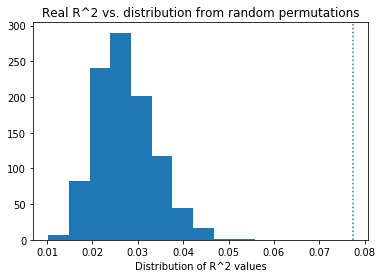

In [40]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Real R^2 vs. distribution from random permutations")

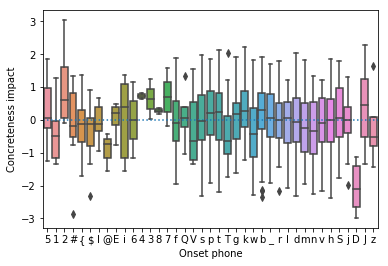

In [10]:
ax = sn.boxplot(data=final_df, x="onset", y="concreteness_impact")
ax.set(xlabel="Onset phone", ylabel="Concreteness impact")
ax.axhline(y=0, linestyle="dotted")

## Discussion and exploration

Based on these results, it seems like:

First, there is more structure in mappings between phonetic onsets and word concreteness than one would expect by chance, one we control for characteristics about the rest of the word.

Certain onsets exhibit particularly strong effects, such as: 
- **/D/** (the onset in *they*) has a consistently *negative* impact on concreteness.
- **/2/** (the onset in *aisle* or *eye*) has a consistently *positive* impact on concreteness.

Other onsets show trends, but not strongly significant trends.

In [21]:
df_merged['initial'] = df_merged['PhonDISC'].apply(lambda x: x[0])

In [29]:
df_merged[df_merged['initial'] == "D"].sample(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Concreteness,initial
3672,that,0.00,1,D{t,ADV,1,2.32,D
3701,those,2.95,1,D5z,PRON,1,2.54,D
3679,then,3.27,1,DEn,ADV,1,1.90,D
3716,thus,2.25,1,DVs,ADV,1,1.97,D
3677,them,3.37,1,DEm,PRON,1,3.44,D


In [24]:
df_merged[df_merged['initial'] == "2"].head(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Concreteness,initial
83,aisle,1.00,1,2l,N,1,5.09,2
1264,eye,2.72,1,2,N,1,6.34,2
1265,eyrie,0.00,0,2@rI,N,3,5.29,2
1784,ice,1.72,1,2s,N,1,6.21,2
1785,icicle,0.00,0,2sIkP,N,3,5.69,2


## Follow-up: What about without controlling for the rest of the word?

Above, we saw the results when controlling for the rest of the word. What if we don't do this, and just measure *word concreteness* as a function of *onset phone*?

In [41]:
result = sm.ols(formula="Concreteness ~ initial", data=df_merged).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Concreteness   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.53
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.54e-67
Time:                        14:10:24   Log-Likelihood:                -6130.9
No. Observations:                3947   AIC:                         1.234e+04
Df Residuals:                    3907   BIC:                         1.259e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4347      0.264     16.814      0.000       3.918       4.952
initial[T.$]    -0.2735      0.353     -0.775      0.439      -0.966       0.419
initial[T.1]    -0.4014      0.378     -1.062      0.289      -1.143       0.340
initial[T.2]     0.1563      0.368      0.424      0.671      -0.566       0.878
initial[T.3]     0.6036      0.538      1.121      0.262      -0.452       1.659
initial[T.4]     1.3353      0.855      1.562      0.118      -0.340       3.011
initial[T.5]    -0.1747      0.347     -0.504      0.615      -0.855       0.506
initial[T.6]    -0.1266      0.436     -0.291      0.771      -0.981       0.727
initial[T.7]     0.2403      0.855      0.281      0.779      -1.435       1.916
initial[T.8]     0.2413      0.578      0.418      0.676      -0.892       1.374
initial[T.@]    -0.9788      0.286     -3.420      0.001      -1.540      -0.418
initial[T.D]    -2.0270      0.414     -4.899      0.000      -2.838      -1.216
initial[T.E]    -0.4869      0.308     -1.580      0.114      -1.091       0.117
initial[T.I]    -1.0362      0.276     -3.750      0.000      -1.578      -0.494
initial[T.J]     0.5337      0.322      1.659      0.097      -0.097       1.164
initial[T.Q]    -0.4094      0.342     -1.198      0.231      -1.079       0.261
initial[T.S]     0.5959      0.312      1.912      0.056      -0.015       1.207
initial[T.T]    -0.1616      0.328     -0.493      0.622      -0.804       0.481
initial[T.V]    -0.7412      0.324     -2.284      0.022      -1.377      -0.105
initial[T._]    -0.0076      0.299     -0.025      0.980      -0.593       0.578
initial[T.b]     0.4811      0.274      1.754      0.079      -0.057       1.019
initial[T.d]    -0.2821      0.275     -1.026      0.305      -0.821       0.257
initial[T.f]    -0.0096      0.276     -0.035      0.972      -0.550       0.531
initial[T.g]     0.1742      0.285      0.612      0.541      -0.384       0.732
initial[T.h]     0.1053      0.279      0.377      0.706      -0.442       0.653
initial[T.i]    -0.2785      0.390     -0.714      0.475      -1.043       0.486
initial[T.j]    -0.4806      0.339     -1.416      0.157      -1.146       0.185
initial[T.k]     0.1863      0.271      0.689      0.491      -0.344       0.717
initial[T.l]     0.1488      0.281      0.530      0.596      -0.402       0.699
initial[T.m]     0.1357      0.275      0.493      0.622      -0.404       0.675
initial[T.n]    -0.0434      0.292     -0.149      0.882      -0.615       0.529
initial[T.p]     0.1208      0.272      0.444      0.657      -0.413       0.654
initial[T.q]     0.2253      1.180      0.191      0.849      -2.087       2.538
initial[T.r]    -0.1709      0.275     -0.621      0.535      -0.711       0.369
initial[T.s]     0.1798      0.269      0.667      0.505      -0.348       0.708
initi

In [48]:

### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 1000

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_merged.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['initial'])
    new_result = sm.ols(formula="Concreteness ~ shuffled_onset", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 1000/1000 [00:36<00:00, 28.36it/s]


In [49]:
p_real = len([r for r in shuffled_rsquares if r >= true_rsquare]) / len(shuffled_rsquares)
print("p={p}".format(p=p_real))

p=0.0


Text(0.5,1,'Real R^2 vs. distribution from random permutations')

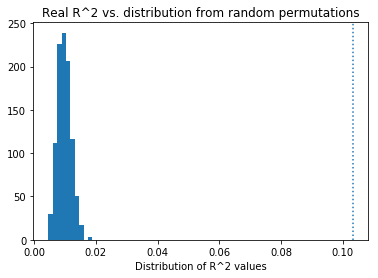

In [50]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Real R^2 vs. distribution from random permutations")

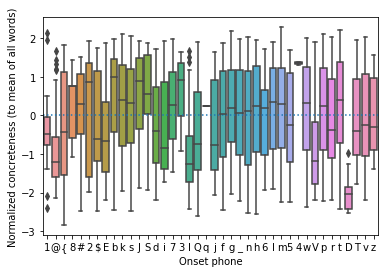

In [55]:
# Rescale
df_merged['Concreteness_normalized'] = df_merged['Concreteness'] - np.mean(df_merged['Concreteness'])

ax = sn.boxplot(data=df_merged, x="initial", y="Concreteness_normalized")
ax.set(xlabel="Onset phone", ylabel="Normalized concreteness (to mean of all words)")
ax.axhline(y=0, linestyle="dotted")

### Follow-up discussion

In the follow-up analysis, we didn't control for features about the rest of the word, and instead asked whether words that begin with particular sounds have systematic differences in their overall concreteness. (Whereas before, we asked whether the same *onset sound* has systematic *impacts* on word concreteness, once we control for the  rest of the word.)

Reassuringly, we see the same trend for **/D/**, which again has a consistent and **strong** negative impact on concreteness. We don't see the same trend for **/2/**, though it's unclear whether this is because it's a null relationship or because there are confounding factors (when we don't control for the rest of the word). Critically, the visualization above is comparing the concreteness of words beginning with a given sound to the *mean* concreteness of all words.

But we also see systematic patterns for a few others:
- Words beginning with **/@/** (e.g. the sound in *away* or *accuser*) are more likely to be **less concrete**.
- Words beginning with **/I/** (e.g. the sound in *exertion* or *exclusion*) are more likely to be **less concrete**.
- Words beginning with **/b/** (e.g. the sound in *body* or *badge*) are slightly more likely (weak levels of significance) to be **more concrete**.

In [59]:
df_merged[df_merged['initial'] == "@"].sample(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Concreteness,initial,Concreteness_normalized
2483,obedient,0.70,2,@bidj@nt,A,3,3.17,@,-1.247857
2490,obscure,0.95,1,@bskj9R,V,2,3.20,@,-1.217857
219,attend,1.88,0,@tEnd,V,2,3.24,@,-1.177857
49,admission,1.28,2,@dmISH,N,3,3.05,@,-1.367857
62,affection,1.42,2,@fEkSH,N,3,2.80,@,-1.617857


In [60]:
df_merged[df_merged['initial'] == "I"].sample(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Concreteness,initial,Concreteness_normalized
1856,infant,1.57,0,Inf@nt,N,2,5.79,I,1.372143
1259,exterior,0.48,1,Ikst7r7R,N,3,4.74,I,0.322143
1914,invitation,1.38,2,InvIt1SH,N,4,4.39,I,-0.027857
1241,excitement,1.58,2,Iks2tm@nt,N,3,2.82,I,-1.597857
1789,idiom,0.48,1,Id7m,N,2,3.60,I,-0.817857


In [61]:
df_merged[df_merged['initial'] == "b"].sample(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Concreteness,initial,Concreteness_normalized
296,bean,1.34,1,bin,N,1,6.04,b,1.622143
263,band,1.65,1,b{nd,N,1,5.90,b,1.482143
443,bridge,1.82,1,brI_,N,1,6.23,b,1.812143
468,bud,0.85,1,bVd,N,1,5.49,b,1.072143
367,blame,0.85,1,bl1m,N,1,2.93,b,-1.487857
